<a href="https://colab.research.google.com/github/stevengregori92/Learn-Multiclass/blob/main/Practice_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji
!gdown https://drive.google.com/uc?id=1ExOL7pE6RR0iii5081DNbeDu8HRINUps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.5 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366831 sha256=6c898204e8fe8605cdd1f09dd23ee1e6fcb70679f22f6dea86dd204767bf35f8
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=212c4a270f944553caeb9776a546c7ba26f5d2144a871878a432cdff3550f617
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml
Downloading...
From: https://drive.google.com/uc?id=1ExOL7pE6RR0iii5081DNbeDu8HRINUps
To: /content/mushrooms.csv
100% 1

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.logistic_regression import illustration

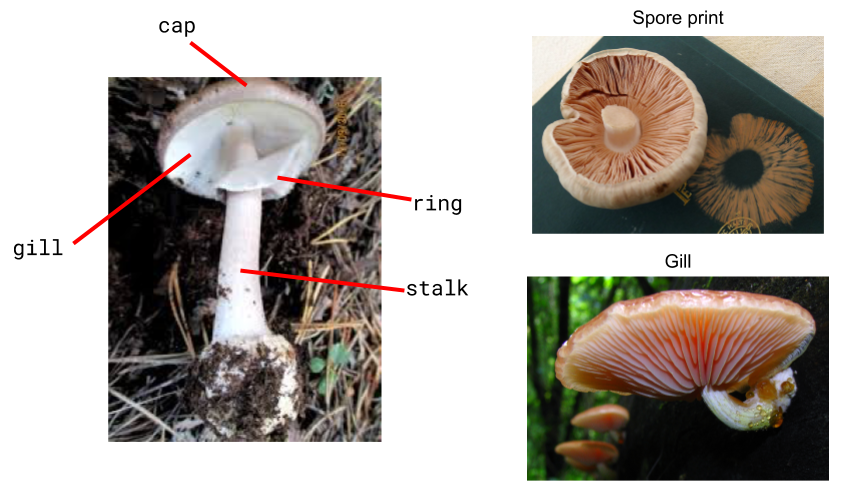

In [3]:
illustration.mushroom

In [4]:
data = pd.read_csv('mushrooms.csv')
data.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


,missing_value,%
edible,0,0.00
cap_shape,0,0.00
cap_surface,0,0.00
cap_color,0,0.00
bruises,0,0.00
odor,0,0.00
gill_attachment,0,0.00
gill_spacing,0,0.00
gill_size,0,0.00
gill_color,0,0.00


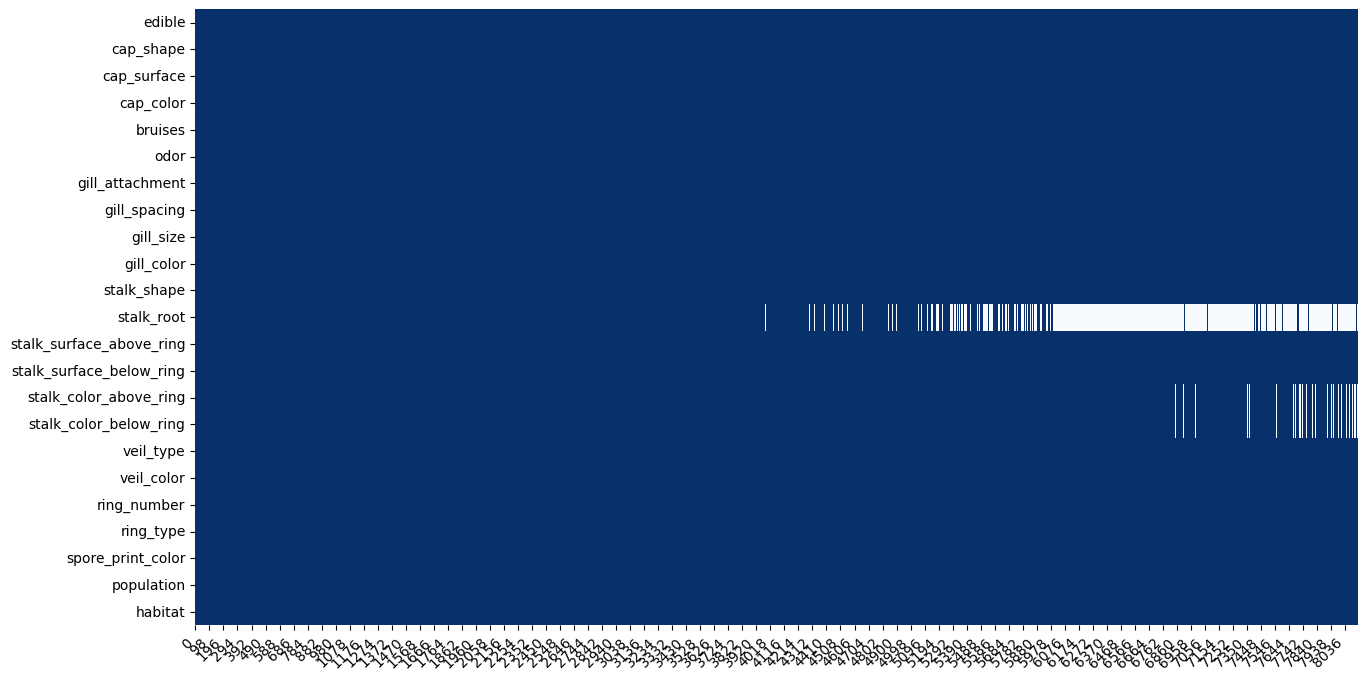

In [5]:
plot_missing_value(data, return_df=True)

In [6]:
data.edible.value_counts()

True     4208
False    3916
Name: edible, dtype: int64

#Association Matrix

In [7]:
from jcopml.plot import plot_association_matrix

In [8]:
data.drop(columns =['veil_type'], inplace=True)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

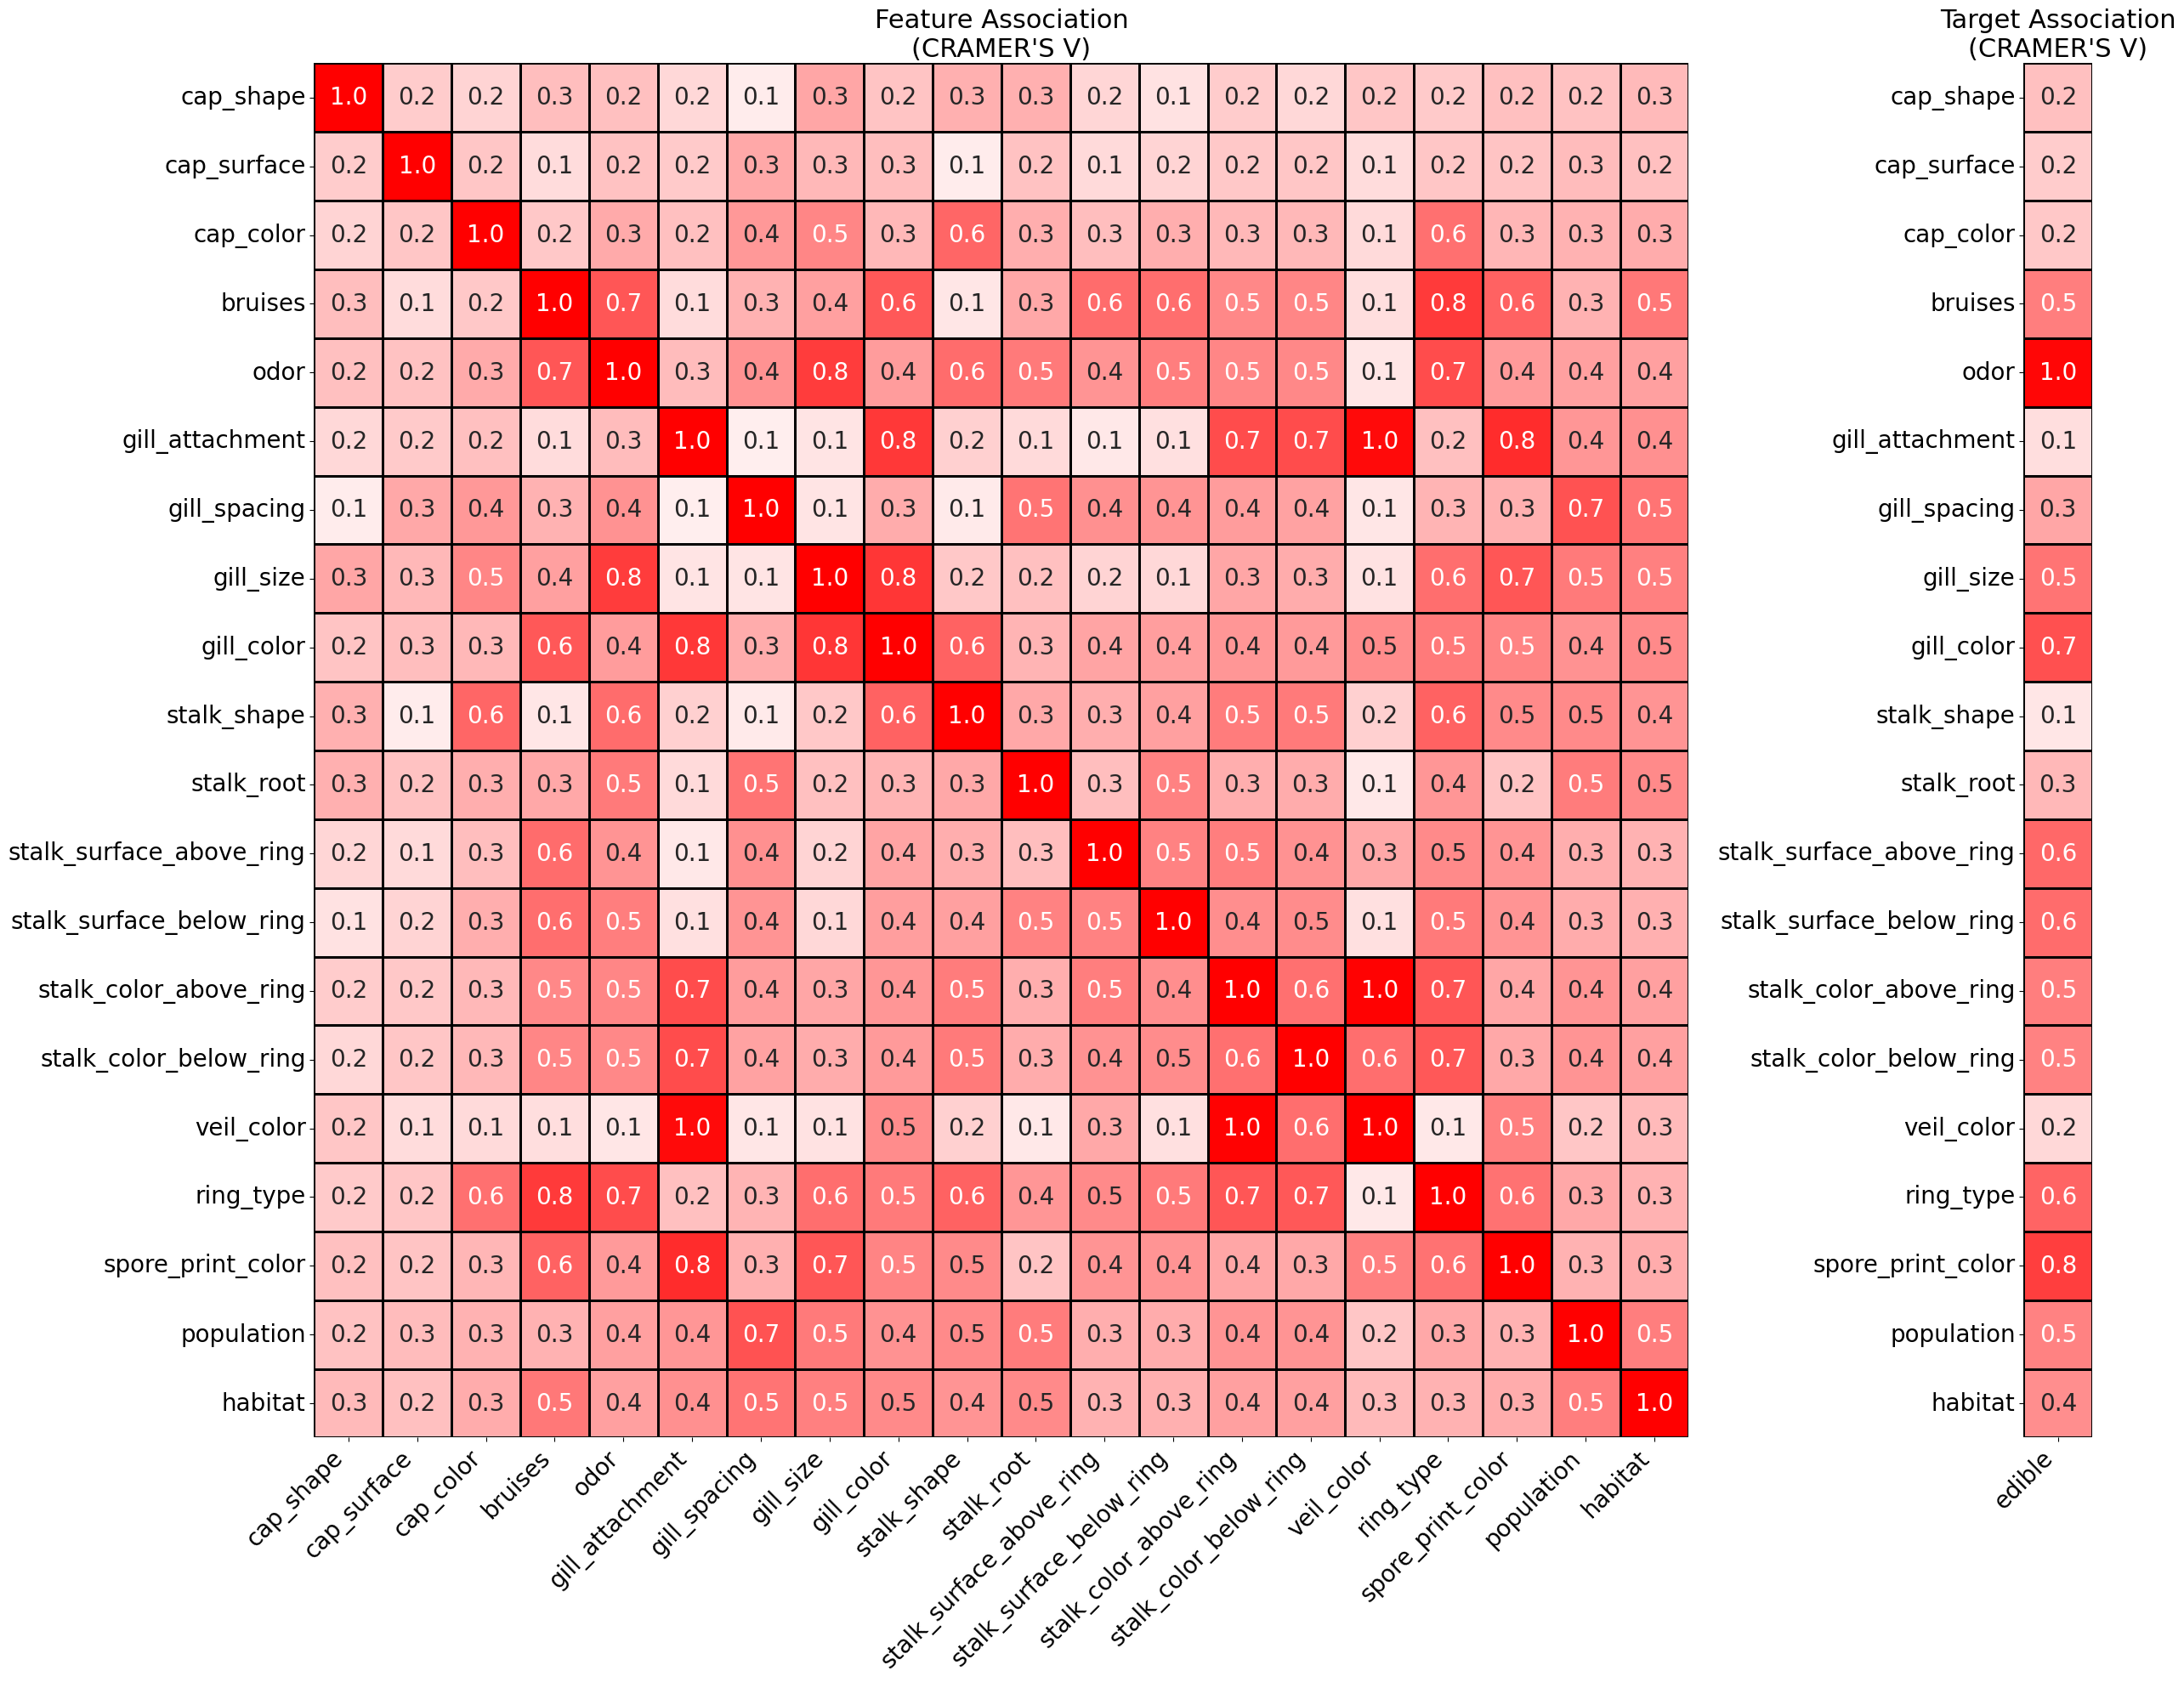

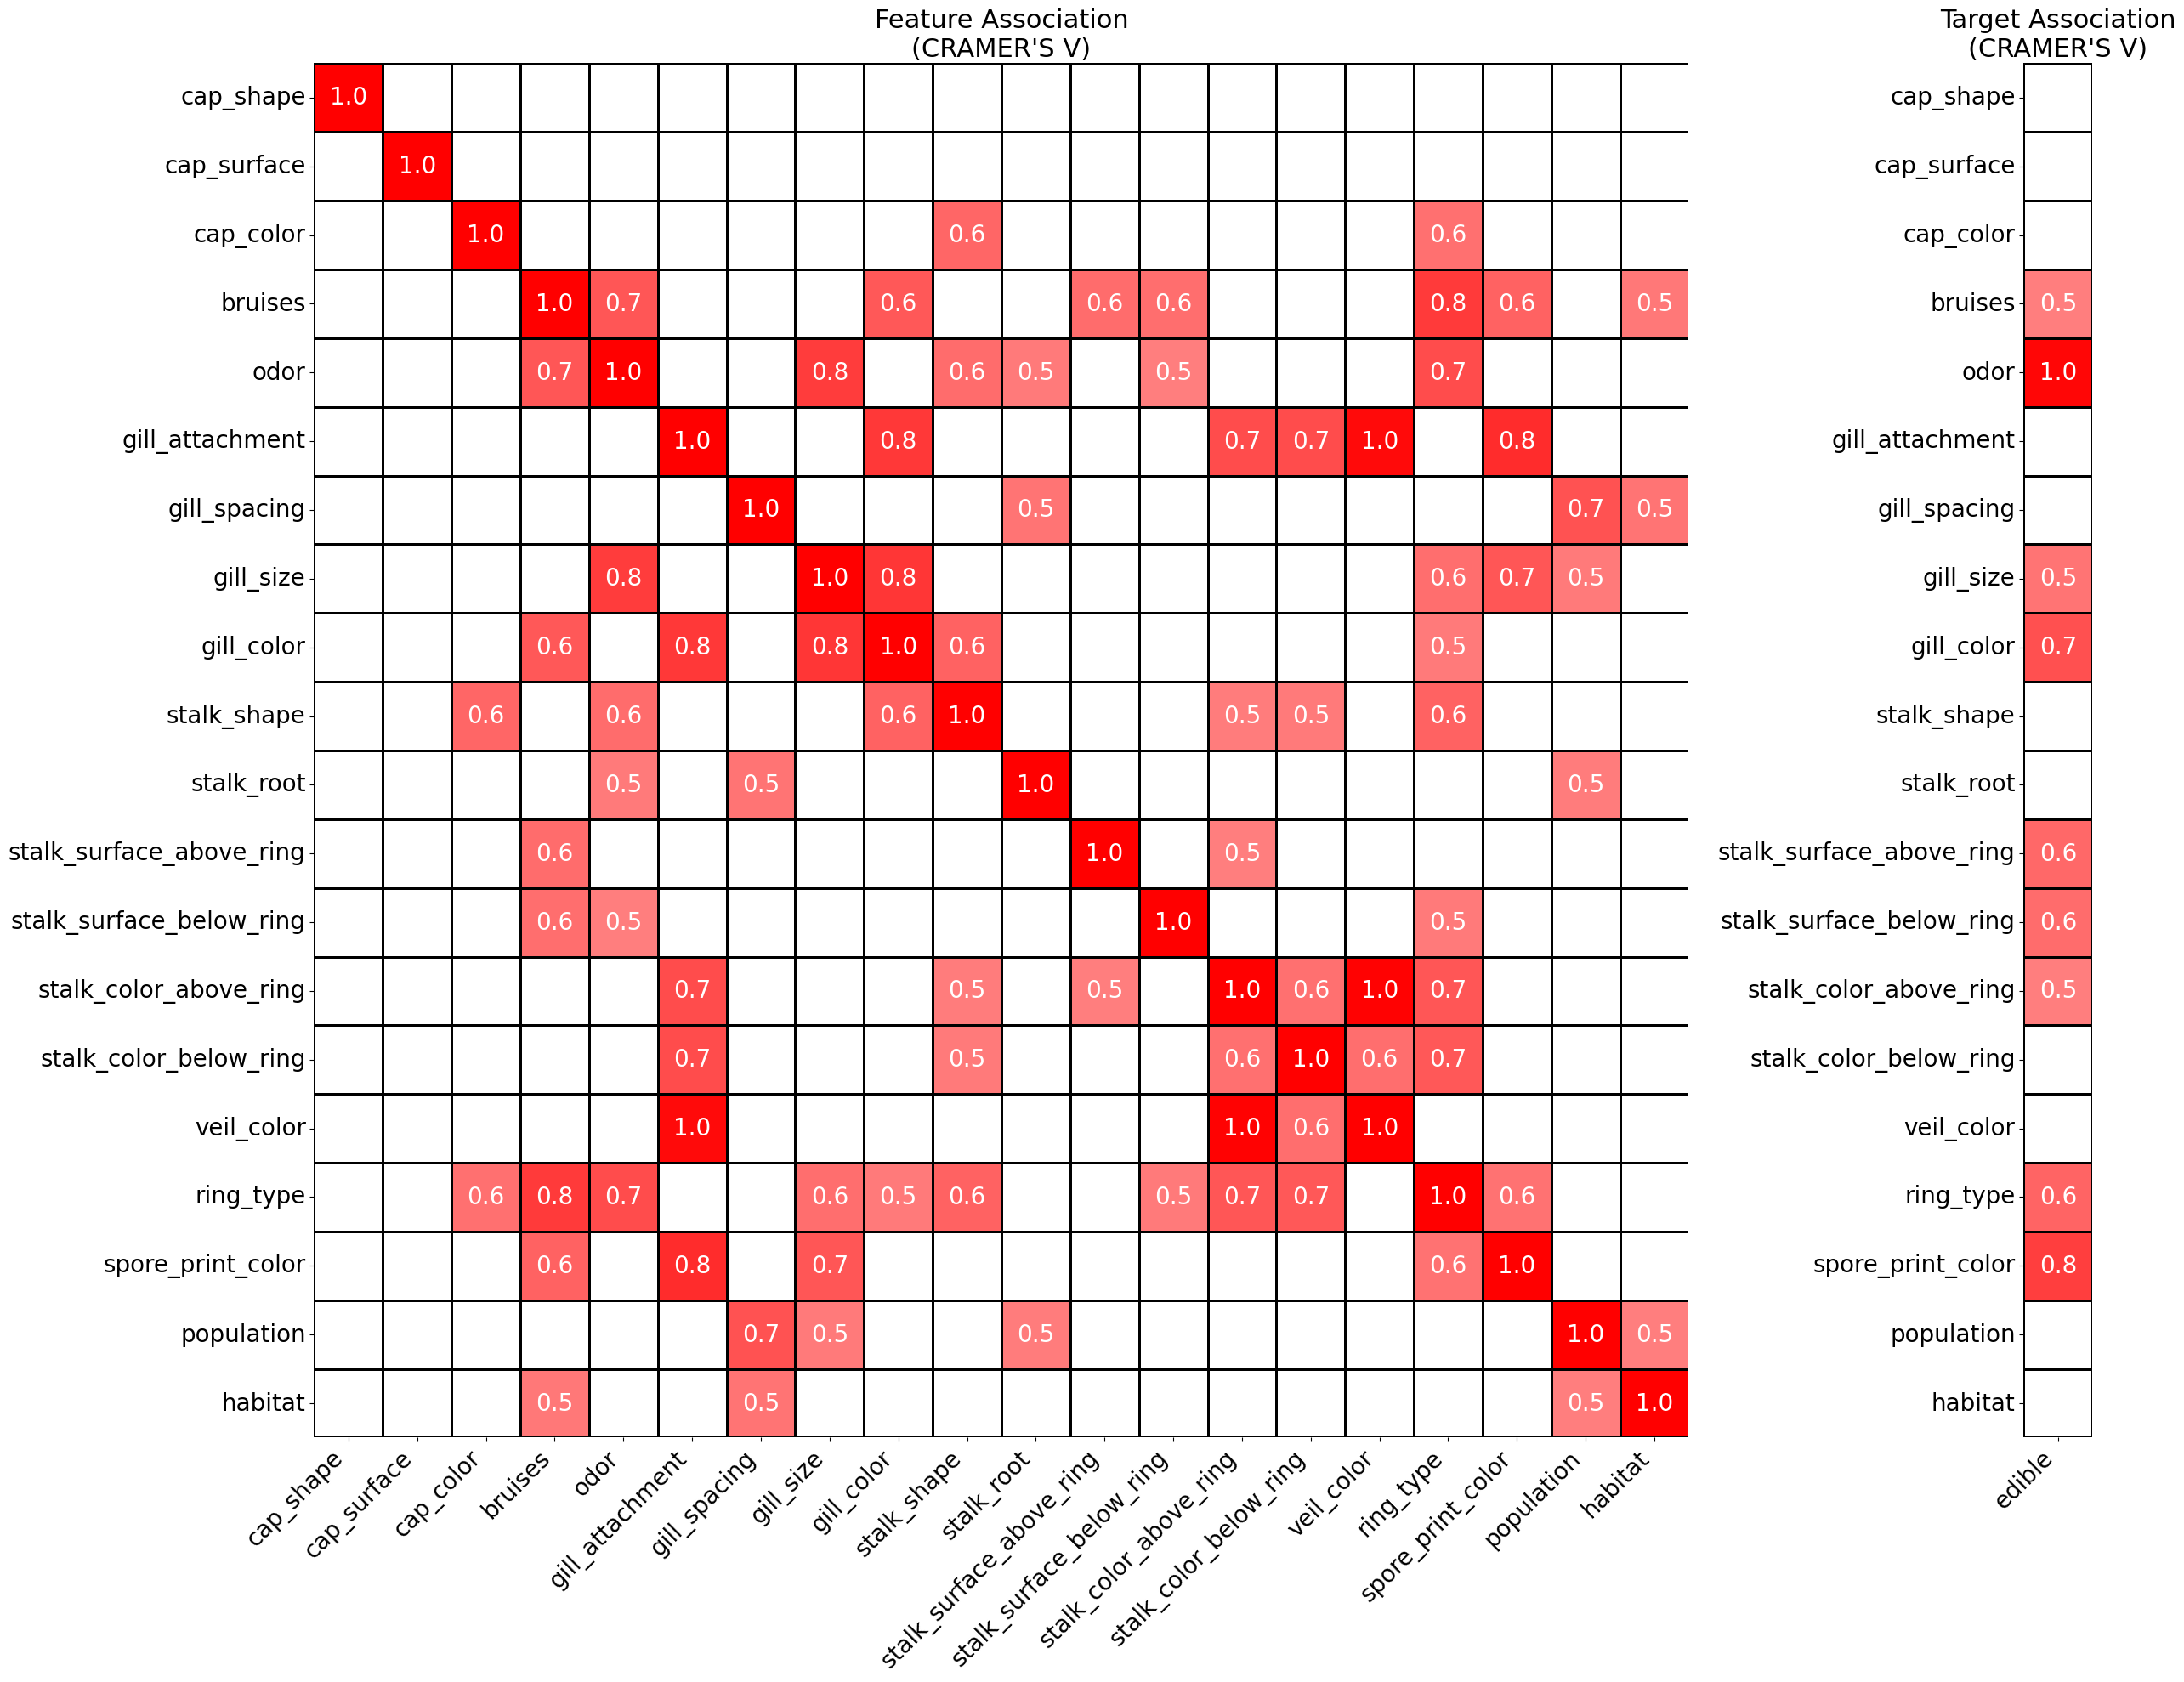

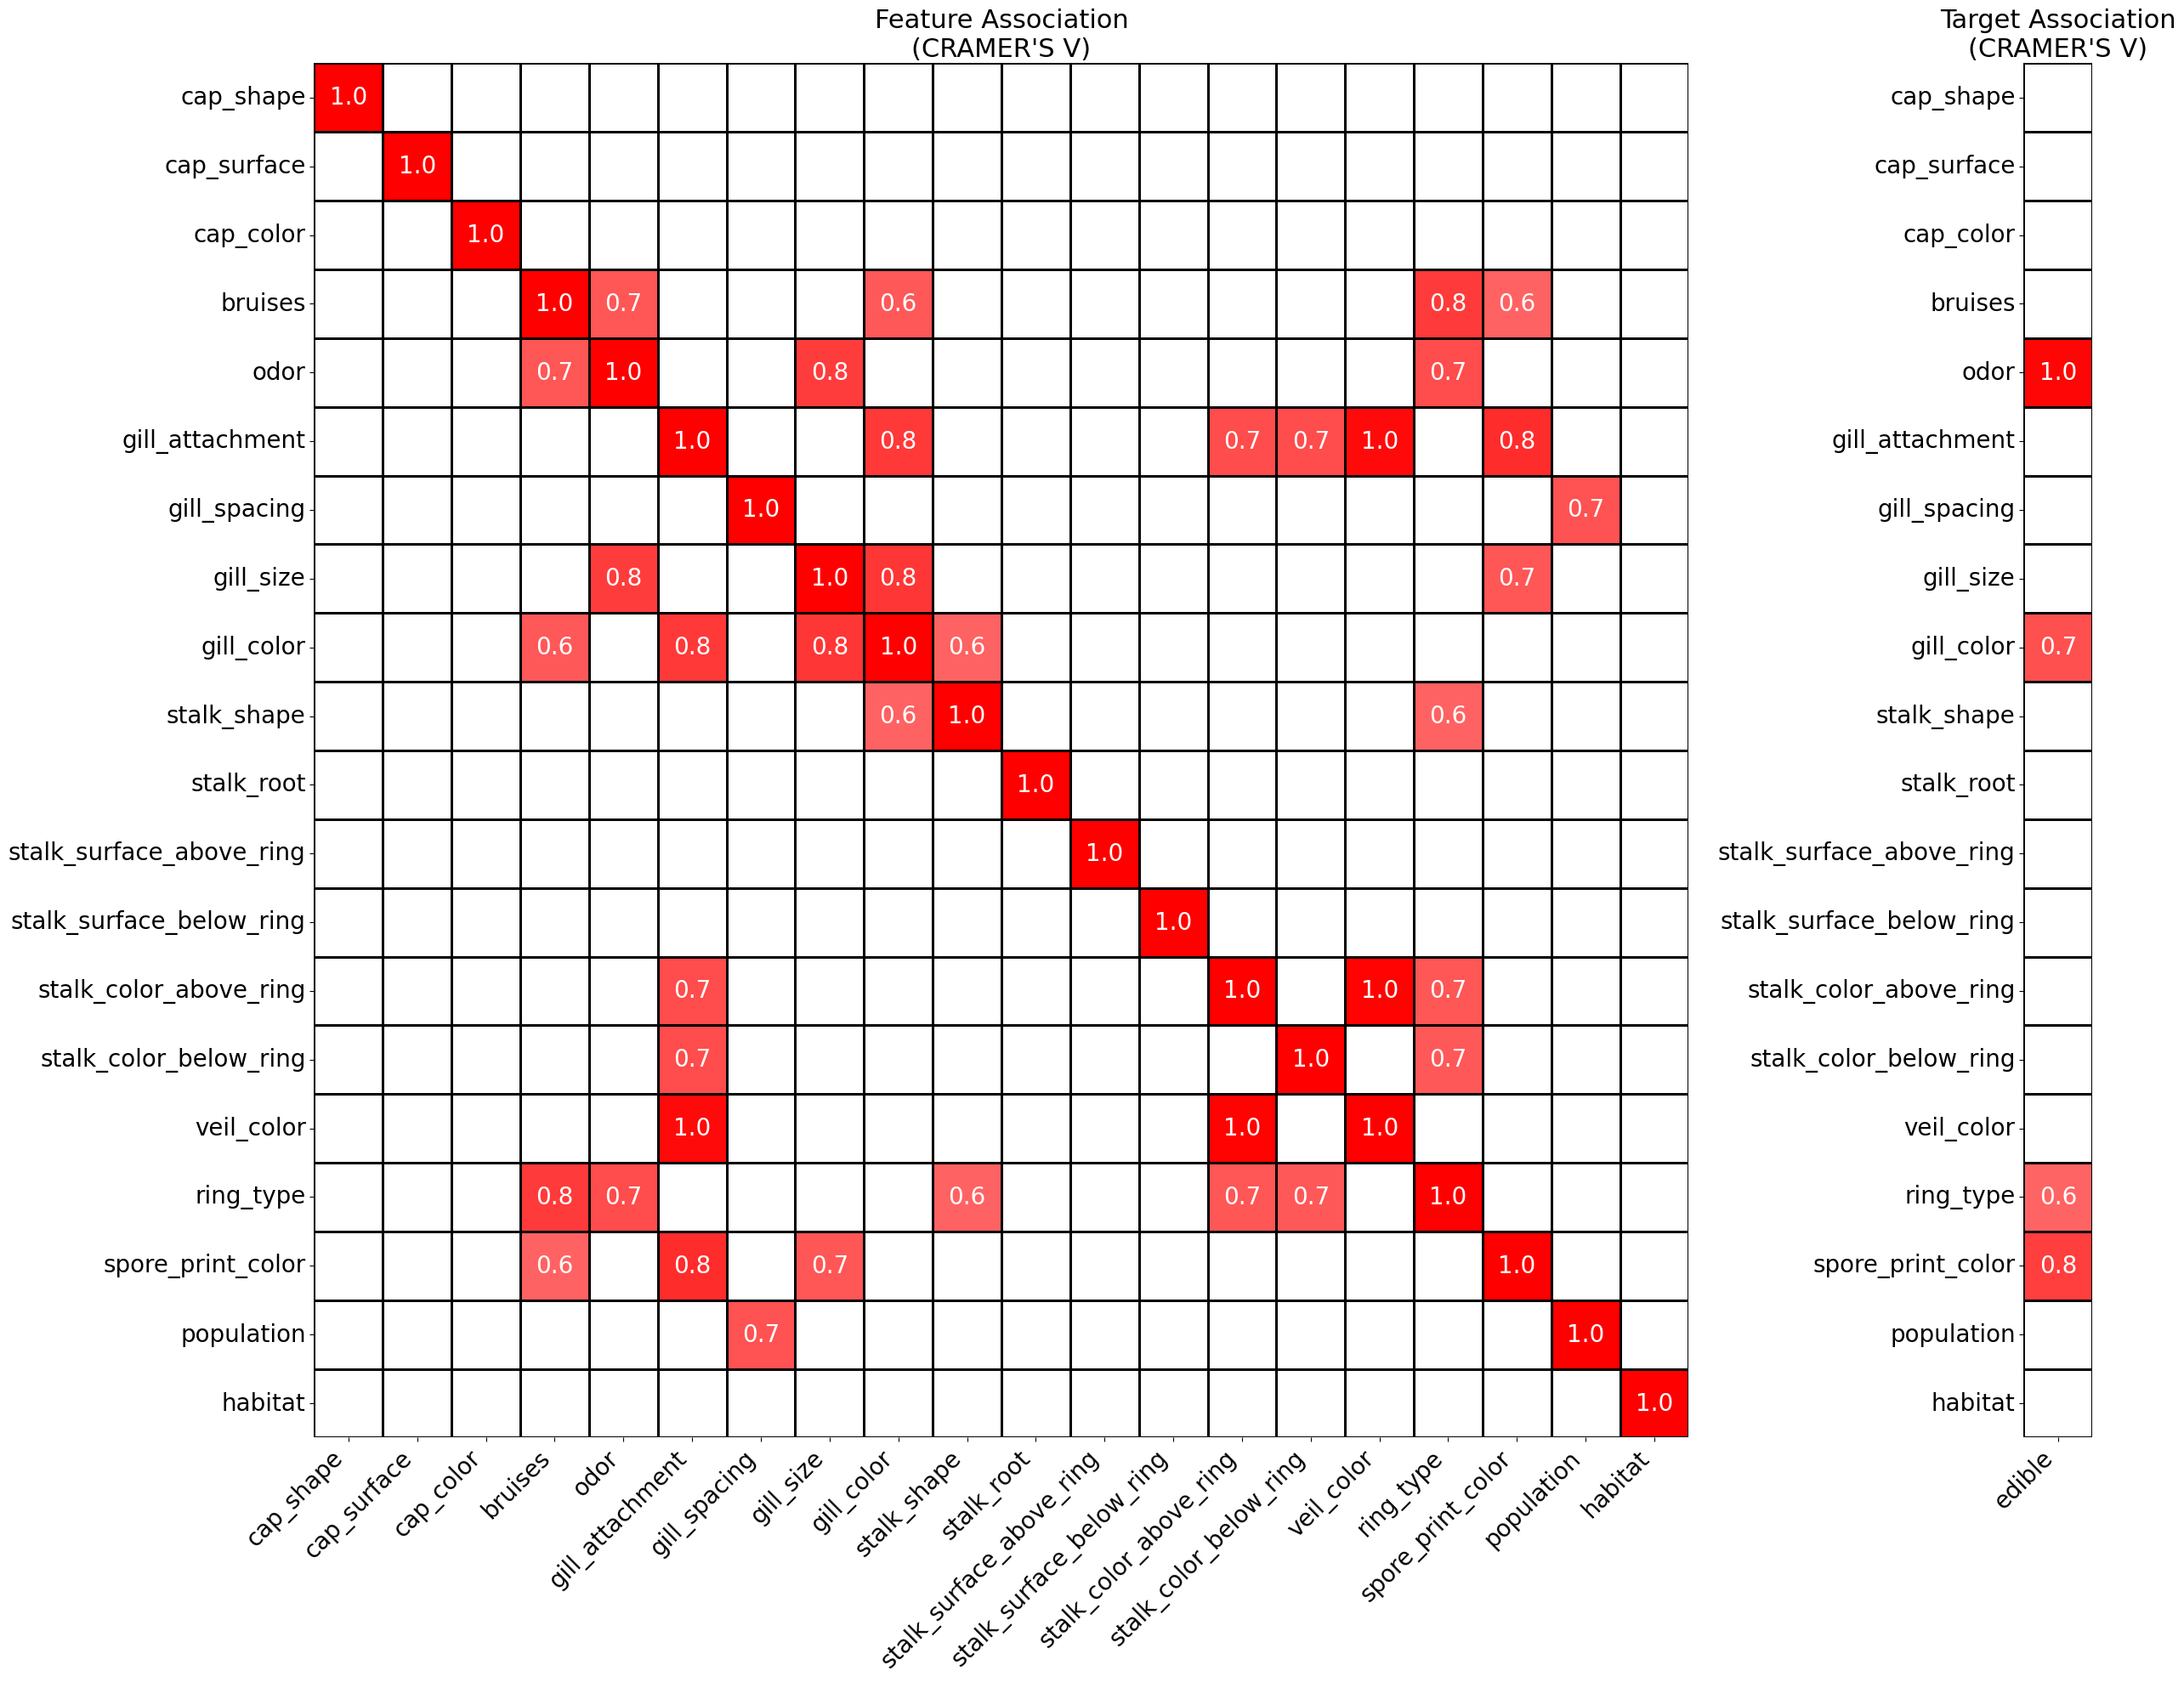

In [9]:
plot_association_matrix(data, target_col='edible', categoric_col='auto')

#Dataset Splitting

In [10]:
X = data[['odor', 'gill_color', 'ring_type', 'spore_print_color']]
y = data.edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

#Training

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [13]:
preprocessor = ColumnTransformer([
    ('numeric', cat_pipe(encoder='onehot'), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', n_jobs = -1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9938452069549162 0.9938453960417766 0.9975384615384615


#Evaluation

In [14]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve

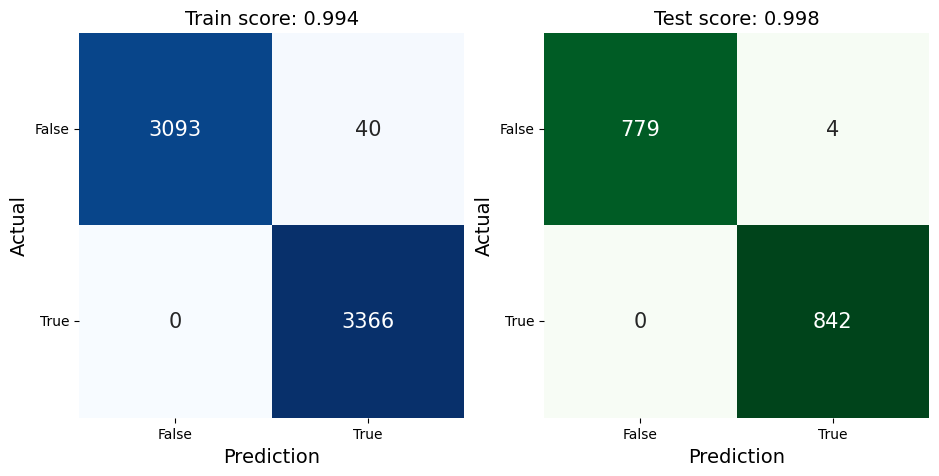

In [15]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [16]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



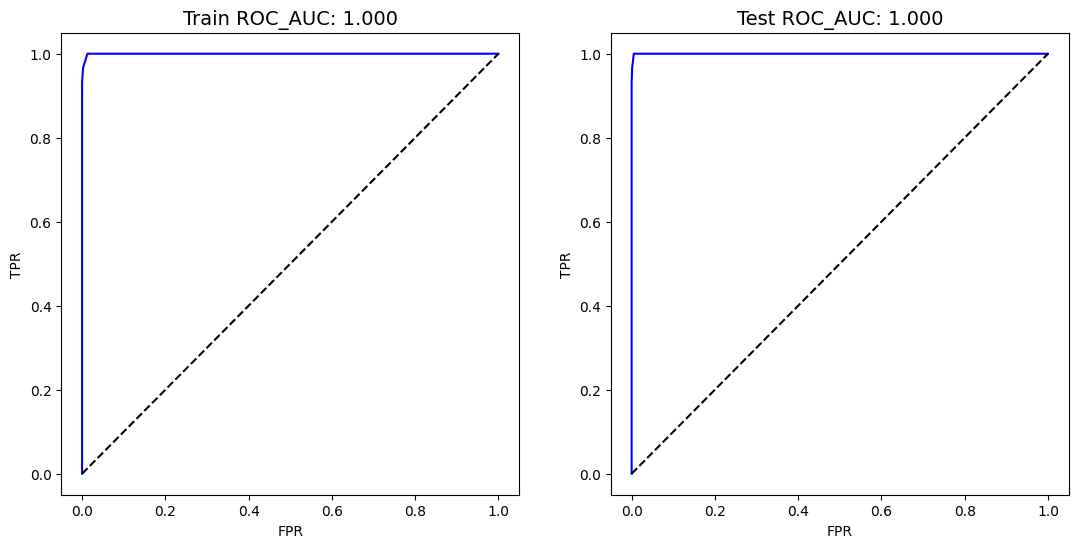

In [17]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

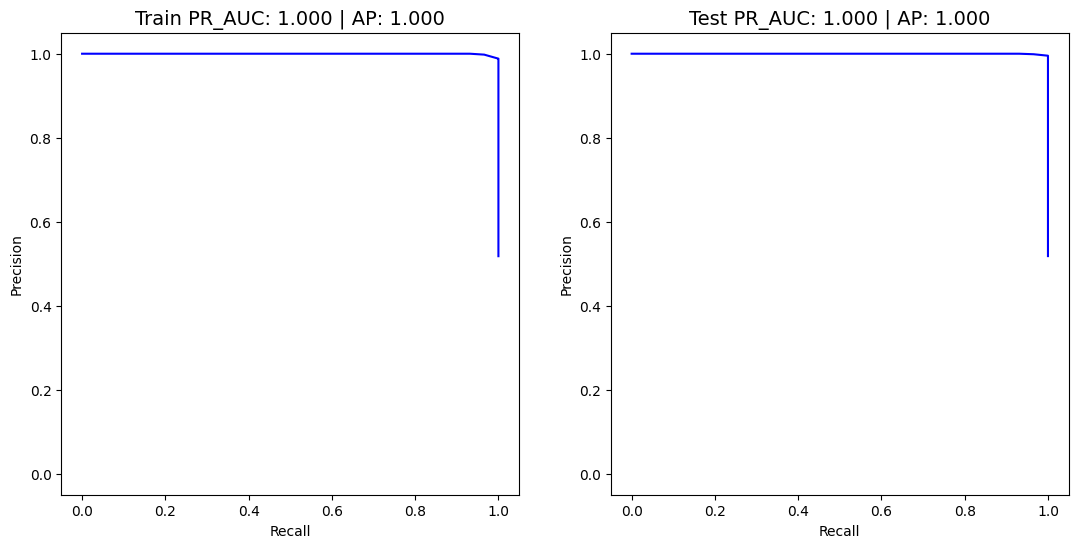

In [18]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

#Feature Importance

,feature,importance,stdev
0,odor,0.445145,0.005125
3,spore_print_color,0.013448,0.000473
1,gill_color,0.000677,0.000209
2,ring_type,0.000246,0.000123


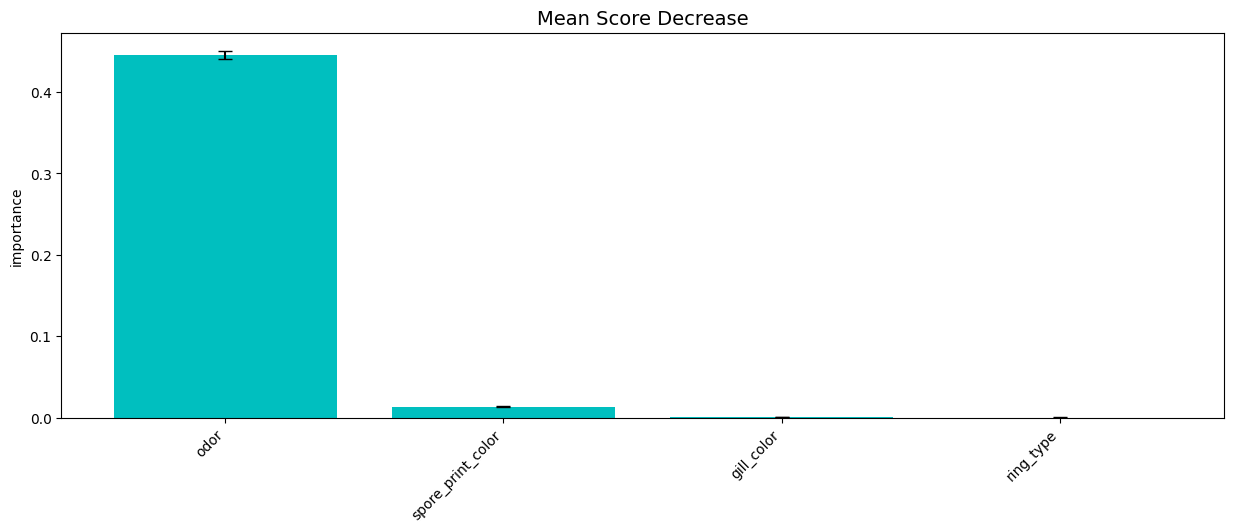

In [19]:
mean_score_decrease(X_train, y_train, model, plot=True)

#Insights from Data

<Axes: xlabel='ring_type', ylabel='count'>

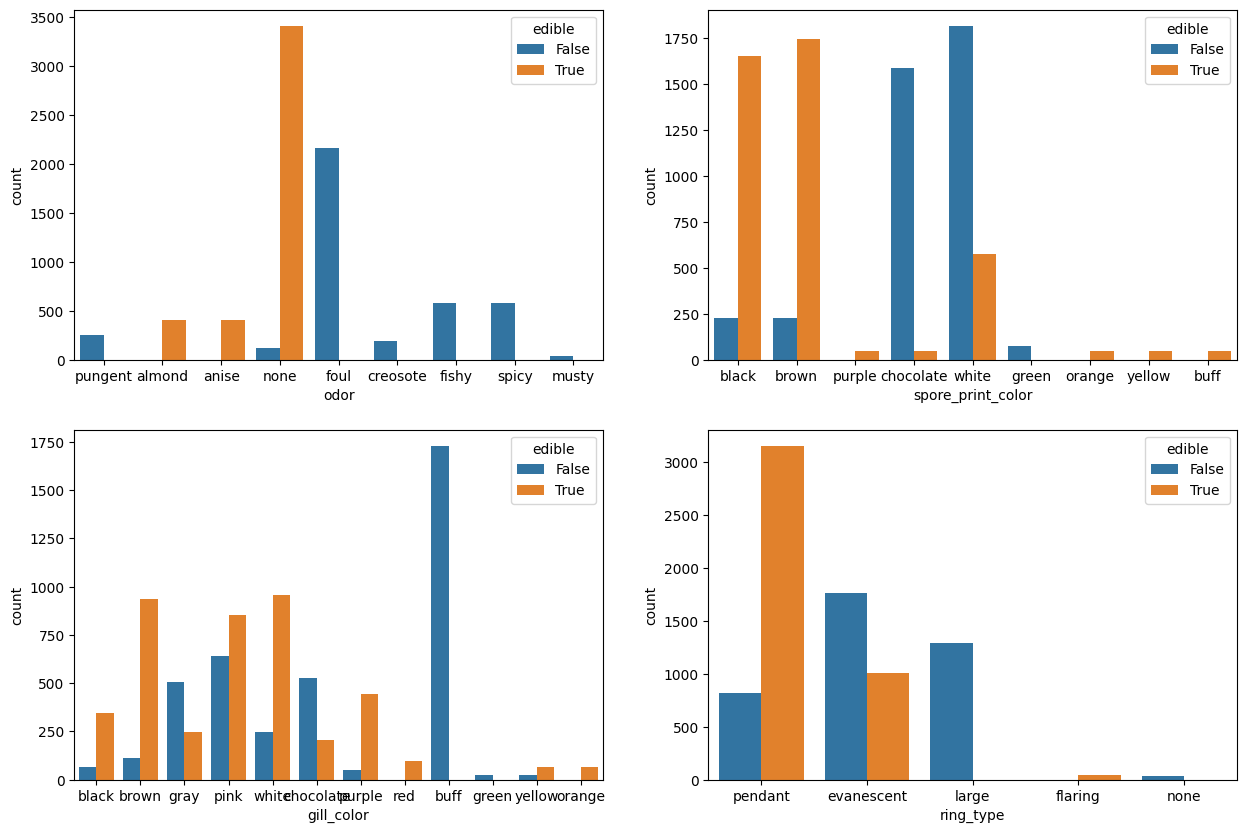

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x = 'odor', data=data, hue = 'edible')
plt.subplot(222)
sns.countplot(x='spore_print_color', data=data, hue = 'edible')
plt.subplot(223)
sns.countplot(x='gill_color', data=data, hue = 'edible')
plt.subplot(224)
sns.countplot(x='ring_type', data=data, hue = 'edible')

#Correlation Ratio

In [21]:
from jcopml.plot import plot_correlation_ratio

/usr/local/lib/python3.10/dist-packages/jcopml/plot/_correlation_ratio.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mean = df_corr.groupby(cat).mean()[numvar]
/usr/local/lib/python3.10/dist-packages/jcopml/plot/_correlation_ratio.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mean = df_corr.groupby(cat).mean()[numvar]
/usr/local/lib/python3.10/dist-packages/jcopml/plot/_correlation_ratio.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

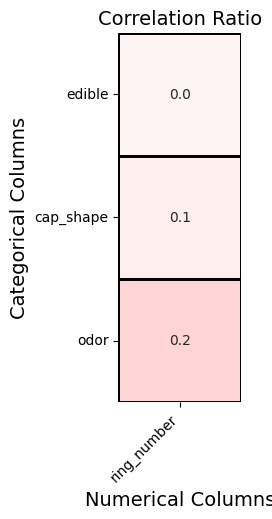

In [22]:
plot_correlation_ratio(data, ['edible', 'cap_shape', 'odor'], ['ring_number'])